**Réalisé par :**
# BARKA AYOUB
# LEHCENE MOHAMMED LAMINE

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
df_train = pd.read_csv('mobile_prices_train.csv')
df_test = pd.read_csv('mobile_prices_test.csv')

In [ ]:
#The shape of the training dataset
df_train.shape


(2000, 21)

In [ ]:
#The shape of the test dataset
df_test.shape

(1000, 21)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
df_train.isnull().sum()
df_train.duplicated().sum()

0

**Remarque:** Il n'y a pas de valeurs manquantes dans l'ensemble de données et il n'y a pas non plus de valeurs dupliquées dans l'ensemble de formation.

In [ ]:
def check_condition_has_internet(row):
    return np.logical_or(row['three_g'] == 1, row['four_g'] == 1)

In [ ]:
# Créez deux nouvelles colonnes "has_internet" et "resolution". La colonne "has_internet" combine les colonnes "three_g" et "four_g". Cette fonction est définie sur True si le téléphone dispose d'une connectivité 3G ou 4G.
# La colonne "résolution" combine la hauteur et la largeur des pixels. Cela nous donne la résolution du téléphone.
df_train['has_internet'] = df_train.apply(check_condition_has_internet, axis=1)
df_train['resolution'] = df_train['px_height'] * df_train['px_width']


In [ ]:
# Appliquer les mêmes transformations au test df_test.
df_test['has_internet'] = df_test.apply(check_condition_has_internet, axis=1)
df_test['resolution'] = df_test['px_height'] * df_test['px_width']

In [ ]:
df_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,has_internet,resolution
0,842,0,2.2,0,1,0,7,0.6,188,2,...,2549,9,7,19,0,0,1,1,False,15120
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,2631,17,3,7,1,1,0,2,True,1799140
2,563,1,0.5,1,2,1,41,0.9,145,5,...,2603,11,2,9,1,1,0,2,True,2167308
3,615,1,2.5,0,0,0,10,0.8,131,6,...,2769,16,8,11,1,0,0,2,True,2171776
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1411,8,2,15,1,1,0,1,True,1464096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,668,13,4,19,1,1,0,0,True,2309580
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,2032,11,10,16,1,1,1,2,True,1797975
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,3057,9,1,5,1,1,0,3,True,1416576
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,869,18,10,19,1,1,1,0,True,225120


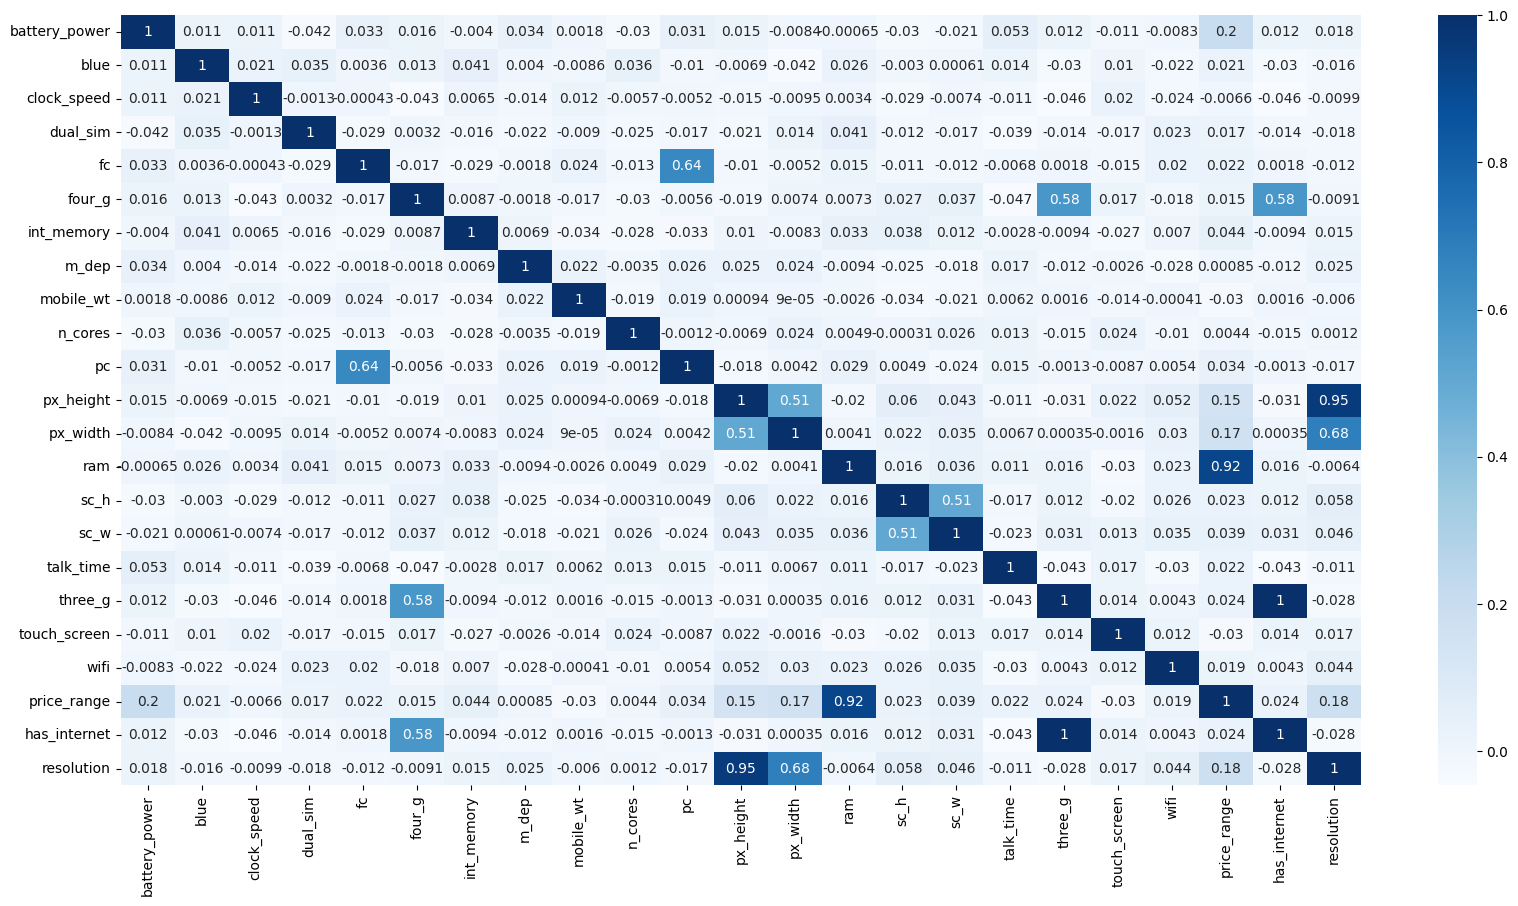

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df_train.corr(),annot = True, cmap = 'Blues')
plt.show()

In [ ]:
# Créer deux nouvelles colonnes 'has_internet' et 'resolution'. La colonne "has_internet" combine les colonnes "three_g" et "four_g".
# Cette fonction est définie sur True si le téléphone dispose d'une connectivité 3G ou 4G.
def check_condition_has_internet(row):
    return np.logical_or(row['three_g'] == 1, row['four_g'] == 1)

# La colonne "resolution" combine la hauteur et la largeur des pixels. Cela nous donne la résolution du téléphone.
df_train['has_internet'] = df_train.apply(check_condition_has_internet, axis=1)
df_train['resolution'] = df_train['px_height'] * df_train['px_width']

# Appliquer les mêmes transformations au test df_test.
df_test['has_internet'] = df_test.apply(check_condition_has_internet, axis=1)
df_test['resolution'] = df_test['px_height'] * df_test['px_width']

Diviser les données en deux ensembles, l'un pour la formation et l'autre pour le test

In [ ]:
from sklearn.model_selection import train_test_split
X = df_train.drop('price_range',axis = 1)
y = df_train['price_range']
X_train, X_validation, y_train, y_validation = train_test_split(X,y,test_size = 0.2,random_state = 7)

In [ ]:
print(X_train.shape,X_validation.shape)

(1600, 22) (400, 22)


In [ ]:
df_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', 'has_internet', 'resolution'],
      dtype='object')

In [ ]:
# Appliquer feature scaling (normalisation) aux colonnes numériques de l'ensemble de données. Cela nous aidera dans le cas d'algorithmes basés sur la distance tels que la régression logistique.

numerical_columns = ['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']
categorical_columns = [i for i in df_train.columns if i not in numerical_columns and i != 'price_range']

if 'resolution' not in numerical_columns:
    numerical_columns.append('resolution')
else:
    pass

if 'has_internet' not in categorical_columns:
    categorical_columns.append('has_internet')
else:
    pass

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Application de OneHotEncoder à la colonne has_internet.
ct = ColumnTransformer(
    transformers=[
        ('scaling', StandardScaler(),numerical_columns),
        ('OHE',OneHotEncoder(drop = 'first'),['has_internet'])
    ],
    remainder='passthrough'
)

# Appliquer la mise à l'échelle des caractéristiques aux colonnes numériques de X_train

X_train_scaled = ct.fit_transform(X_train)
X_validation_scaled = ct.transform(X_validation)
X_test_scaled = ct.transform(df_test)

feature_names = ct.get_feature_names_out()
feature_names = [item.split("__")[1] for item in feature_names]

X_train_scaled = pd.DataFrame(X_train_scaled, columns = feature_names)
X_validation_scaled = pd.DataFrame(X_validation_scaled, columns = feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = feature_names)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Créez une instance du modèle de régression logistique

lr = LogisticRegression()
# Entraînez le modèle sur les données d'entraînement
lr.fit(X_train_scaled,y_train)
y_pred_lr = lr.predict(X_validation_scaled)

In [ ]:
lr_accuracy = accuracy_score(y_validation,y_pred_lr)
print(f'Accuracy score when using Logistic Regression is: {100*lr_accuracy} %')

Accuracy score when using Logistic Regression is: 96.5 %


In [ ]:
# Obtenir un rapport de classification détaillé
report = classification_report(y_validation, y_pred_lr)
print("Rapport de classification :\n", report)

Rapport de classification :
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       109
           1       0.90      0.96      0.93        89
           2       0.98      0.94      0.96       106
           3       0.99      1.00      0.99        96

    accuracy                           0.96       400
   macro avg       0.96      0.97      0.96       400
weighted avg       0.97      0.96      0.97       400



In [ ]:
# Effectuer une validation croisée pour voir si le modèle est surajouté aux données
cross_val_lr =  cross_val_score(lr,X_train_scaled, y_train, cv = 10, scoring = 'accuracy')

In [ ]:
print(f'On performing 10 fold cross validation, the accuracy score for Logistic Regression is {np.round(100*cross_val_lr.mean(),2)} % with a standard deviation of {np.round(100*cross_val_lr.std(),2)}')

On performing 10 fold cross validation, the accuracy score for Logistic Regression is 95.0 % with a standard deviation of 1.56


In [ ]:
df_train.corr()['price_range'].sort_values(ascending = False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
resolution       0.176240
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
has_internet     0.023611
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

In [ ]:
# Ré-exécuter le modèle sans les caractéristiques "resolution", "has_internet", "clock_speed", "m_dep", "n_cores" pour vérifier s'il y a une amélioration dans la performance du modèle.
X_train_new = X_train_scaled.drop(['m_dep','clock_speed','n_cores','three_g','four_g','resolution','dual_sim','wifi','clock_speed'],axis = 1)
X_validation_new = X_validation_scaled.drop(['m_dep','clock_speed','n_cores','three_g','four_g','resolution','dual_sim','wifi','clock_speed'],axis = 1)

# Application de la régression logistique aux données

lr.fit(X_train_new,y_train)
y_pred_lr = lr.predict(X_validation_new)


In [ ]:
X_test_new = X_test_scaled.drop(['m_dep','clock_speed','n_cores','three_g','four_g','resolution','dual_sim','wifi','clock_speed'],axis = 1)
y_pred_test = lr.predict(X_test_new)

In [ ]:
df_test.sample(5)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,has_internet,resolution,Logistic Regression Prediction
266,267,1396,1,0.8,1,7,1,10,0.3,108,...,3881,13,0,9,1,1,1,True,1111766,3
608,609,1894,1,0.5,1,10,0,16,0.1,172,...,1021,18,17,16,1,1,0,True,3165058,1
581,582,1887,0,2.1,0,0,0,23,0.5,148,...,1811,18,16,11,1,1,0,True,1258848,2
894,895,1949,1,1.5,0,1,1,7,0.5,175,...,1406,5,1,8,1,1,0,True,744975,1
918,919,534,1,1.9,1,1,1,60,0.2,159,...,3599,10,4,8,1,0,1,True,2245952,3


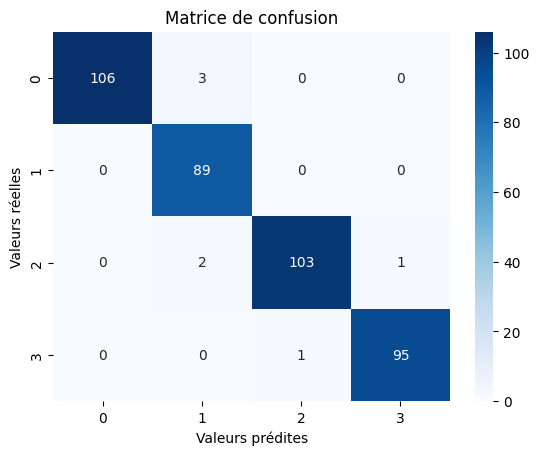

In [ ]:
#calculer la matrice de confusion entre les valeurs réelles et prédites
cm = confusion_matrix(y_validation,y_pred_lr)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Valeurs prédites")
plt.ylabel("Valeurs réelles")
plt.title("Matrice de confusion")
plt.show()